<a href="https://colab.research.google.com/github/prtejas12/Sentimental-Analysis/blob/main/GoogleCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"]="/content"

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 143MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d dataset

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: dataset/sampleSubmission.csv  
  inflating: dataset/test.tsv.zip    
  inflating: dataset/train.tsv.zip   


In [ ]:
train_data=pd.read_csv("/content/ataset/train.tsv.zip",sep="\t")
test=pd.read_csv("/content/ataset/test.tsv.zip",sep="\t")

In [ ]:
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
train_data.Sentiment.value_counts(normalize=True)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

Here we can see that 50% of the training dataset is neutral and 21% is somewhat positive and 17% of the training data is somewhat negative and 4% is negetive and 5% is positive



0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

EDA: now lets explore the dataset

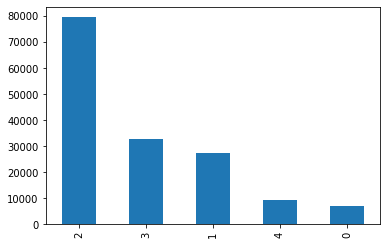

In [ ]:
train_data.Sentiment.value_counts().plot(kind="bar")

In [ ]:
train_data[:10]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def tokenize_stem(sentence):
  return [stemmer.stem(token) for token in word_tokenize(sentence) if token.isalpha()]

In [ ]:
stemmer=SnowballStemmer(language="english")

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords=stopwords.words("english")

In [ ]:
",".join(stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [ ]:
selected_stopwords=stopwords[:115]

In [ ]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize_stem,stop_words=selected_stopwords,ngram_range=(1,2),max_features=4000)

In [ ]:
vectorizer.fit(train_data.Phrase)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=4000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize_stem at 0x7fbad5046550>)

In [ ]:
len(vectorizer.vocabulary_)

4000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abund', 'abus', 'academi', 'academi award', 'accent',
       'accept', 'access', 'acclaim', 'accompani', 'accomplish',
       'account', 'accur', 'ach', 'achiev', 'acknowledg', 'acquir',
       'across', 'act', 'act like', 'action', 'action film',
       'action flick', 'action hero', 'action movi', 'action sequenc',
       'activ', 'actor', 'actress', 'actual', 'ad', 'adam',
       'adam sandler', 'adapt', 'add', 'addict', 'addit', 'address',
       'adequ', 'adher', 'admir', 'admit', 'adolesc', 'ador', 'adrenalin',
       'adult', 'advanc', 'advantag', 'adventur', 'advic', 'aesthet',
       'affair', 'affect', 'affirm', 'afraid', 'african', 'afternoon',
       'age', 'agent', 'aggress', 'ago', 'ah', 'ahead', 'ai', 'aid',
       'aim', 'aimless', 'air', 'aisl', 'alabama', 'albeit', 'album',
       'alert', 'alic', 'alien', 'aliv', 'alleg', 'allegori', 'allen',
       'allow', 'allow us', 'almos

In [ ]:
train=vectorizer.transform(train_data.Phrase)

In [ ]:
train.shape

(156060, 4000)

In [ ]:
x=train.toarray()[0][:100]

In [ ]:
x[94]

0.256333572692096

In [ ]:
string=train_data.Phrase[0]

In [ ]:
string

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [ ]:
vectorizer.get_feature_names_out()[94:100]

array(['also', 'also one', 'altern', 'although', 'altogeth', 'alway'],
      dtype=object)

In [ ]:
156060*0.8

124848.0

In [ ]:
input=train[:130000]
target=train_data.Sentiment[:130000]
validation=train[130000:]
val_targets=train_data.Sentiment[130000:]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(input,target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
trainprediction=model.predict(input)

In [ ]:
trainprediction.shape

(130000,)

In [ ]:
target.shape

(130000,)

In [ ]:
val_targets

130000    1
130001    1
130002    2
130003    2
130004    2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 26060, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(target,trainprediction)

0.6550230769230769

In [ ]:
val_pred=model.predict(validation)

In [ ]:
accuracy_score(val_targets,val_pred)

0.5872217958557175

In [ ]:
test_input=test.Phrase

In [ ]:
test_input

0        An intermittently pleasing but mostly routine ...
1        An intermittently pleasing but mostly routine ...
2                                                       An
3        intermittently pleasing but mostly routine effort
4               intermittently pleasing but mostly routine
                               ...                        
66287               A long-winded , predictable scenario .
66288                 A long-winded , predictable scenario
66289                                      A long-winded ,
66290                                        A long-winded
66291                                 predictable scenario
Name: Phrase, Length: 66292, dtype: object

In [ ]:
test_=vectorizer.transform(test_input)

In [ ]:
test_pred=model.predict(test_)

In [ ]:
test_pred

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
submission=pd.read_csv("ataset/sampleSubmission.csv")

In [ ]:
submission

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
submission.Sentiment=test_pred

In [ ]:
submission.to_csv("submission.csv",index=None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest=RandomForestClassifier()
random_forest.fit(input,target)

RandomForestClassifier()

In [ ]:
rd_train_pred=random_forest.predict(input)

In [ ]:
rd_train_pred

array([1, 2, 2, ..., 2, 2, 1])

In [ ]:
accuracy_score(target,rd_train_pred)

0.8112